### Wine Quality Data Set Information:

The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity   
2 - volatile acidity   
3 - citric acid   
4 - residual sugar   
5 - chlorides   
6 - free sulfur dioxide   
7 - total sulfur dioxide   
8 - density   
9 - pH   
10 - sulphates   
11 - alcohol   
Output variable (based on sensory data):   
12 - quality (score between 0 and 10)   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading the Data

In [2]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### EDA

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.duplicated().sum()

240

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(1359, 12)

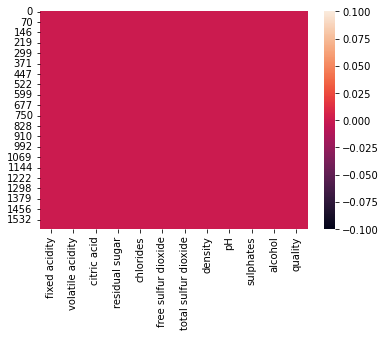

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

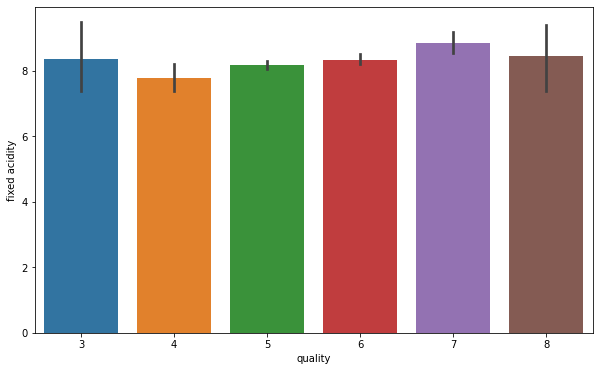

In [11]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(data =df, x ='quality', y ='fixed acidity')
plt.show()

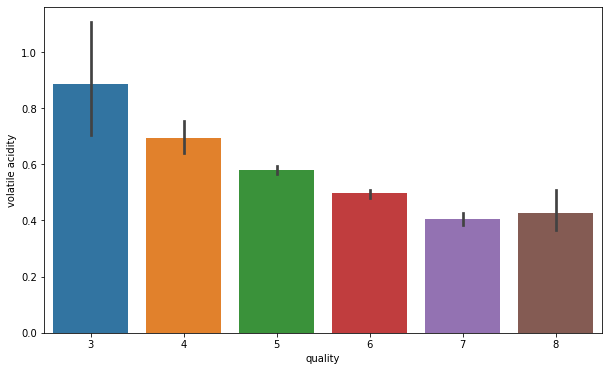

In [12]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(data=df, x = 'quality', y = 'volatile acidity')
plt.show()

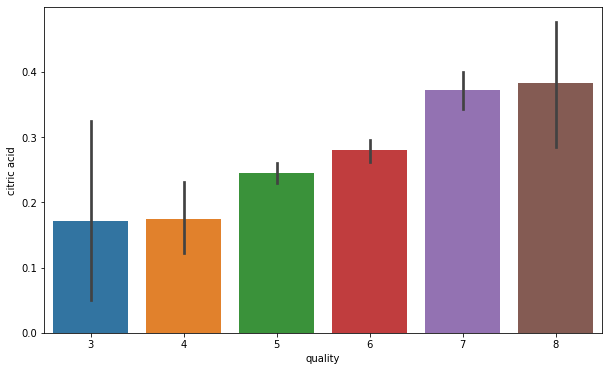

In [13]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(data=df,x = 'quality', y = 'citric acid')
plt.show()

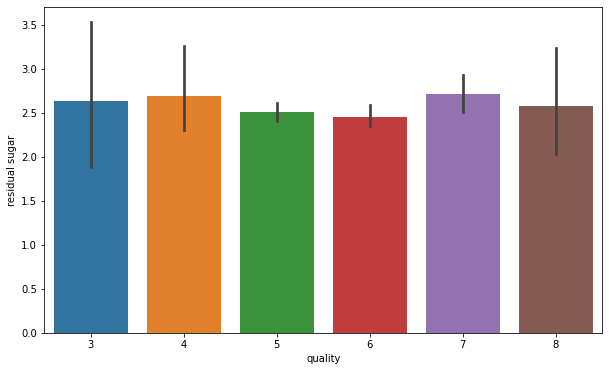

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(data=df,x = 'quality', y = 'residual sugar')
plt.show()

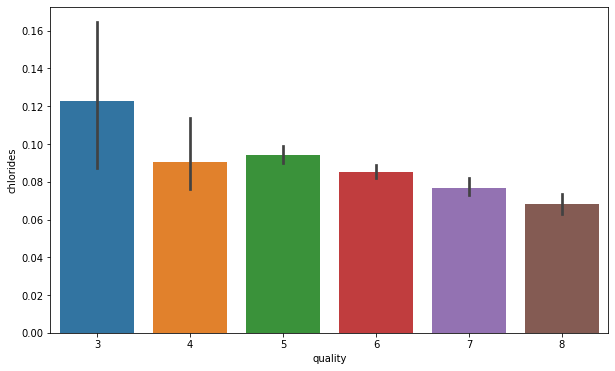

In [15]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(data=df, x = 'quality', y = 'chlorides')
plt.show() 

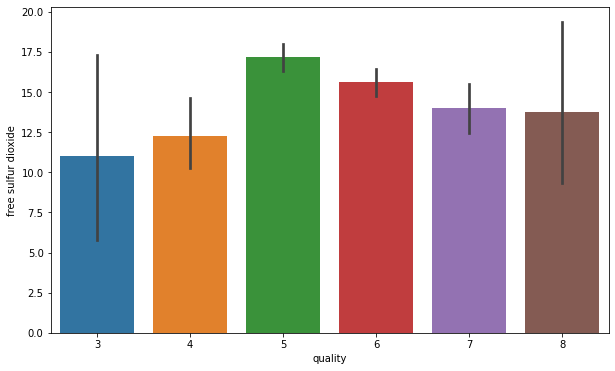

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(data=df, x = 'quality', y = 'free sulfur dioxide')
plt.show() 

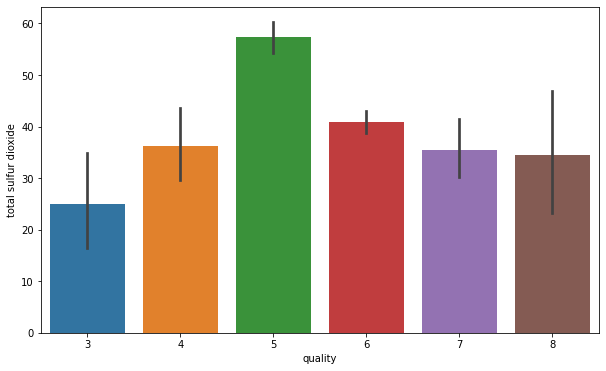

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(data=df,x = 'quality', y = 'total sulfur dioxide')
plt.show() 

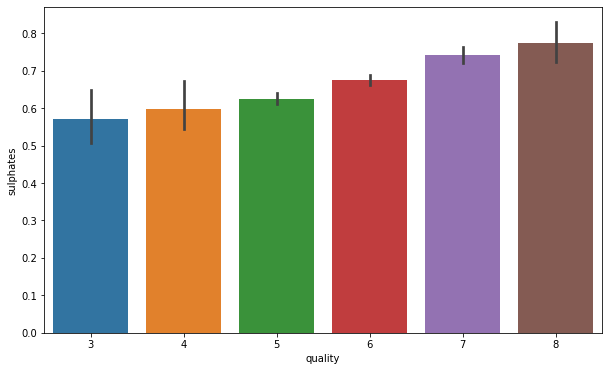

In [18]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(data=df, x = 'quality', y = 'sulphates')
plt.show()  

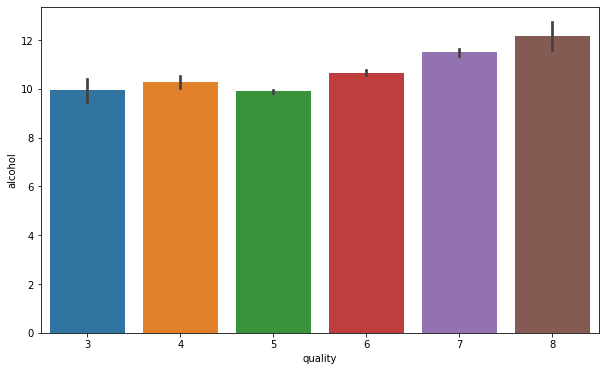

In [19]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(data=df,x = 'quality', y = 'alcohol')
plt.show() 

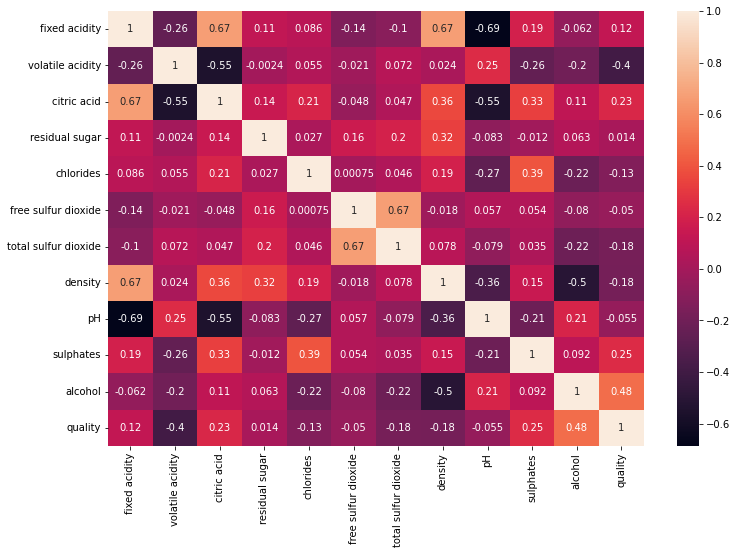

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [22]:
df['quality'].sample(20)

1375    5
1332    6
1219    6
317     6
1130    6
1181    5
41      4
48      5
1216    6
2       5
37      7
1189    4
1422    6
74      5
1139    6
1167    7
411     5
623     6
1475    7
1553    5
Name: quality, dtype: int64

In [23]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [24]:
df['quality'].value_counts()

good    719
bad     640
Name: quality, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
#Bad becomes 0 and good becomes 1 
df['quality'] = le.fit_transform(df['quality'])

In [27]:
df['quality'].value_counts()

1    719
0    640
Name: quality, dtype: int64

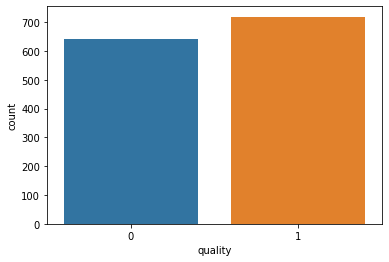

In [28]:
sns.countplot(df['quality'])
plt.show()

In [29]:
X = df.drop('quality', axis = 1)
Y = df['quality']

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [33]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [34]:
Y_train.value_counts()

1    500
0    451
Name: quality, dtype: int64

In [35]:
# Craeting a function which will train and predict the model according to the algorithm and also will print the classification 
# report and confusion matrix. This will save time
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print('confusion matrix')
    print(confusion_matrix(Y_test,Y_pred))
    return model

### LOGISTIC REGRESSION

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [37]:
lr=LogisticRegression()

In [38]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.65      0.72      0.69       189
           1       0.73      0.67      0.70       219

    accuracy                           0.69       408
   macro avg       0.69      0.70      0.69       408
weighted avg       0.70      0.69      0.69       408

confusion matrix
[[136  53]
 [ 72 147]]


### DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt=DecisionTreeClassifier(random_state=1)

In [41]:
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       189
           1       0.68      0.68      0.68       219

    accuracy                           0.65       408
   macro avg       0.65      0.65      0.65       408
weighted avg       0.65      0.65      0.65       408

confusion matrix
[[118  71]
 [ 71 148]]


In [42]:
dt1=DecisionTreeClassifier(random_state=1,criterion="entropy")

In [43]:
dt1=create_model(dt1)
#gini is better here

              precision    recall  f1-score   support

           0       0.60      0.65      0.62       189
           1       0.67      0.63      0.65       219

    accuracy                           0.64       408
   macro avg       0.64      0.64      0.64       408
weighted avg       0.64      0.64      0.64       408

confusion matrix
[[122  67]
 [ 80 139]]


### PRUNING TECHNIQUES
1. Max Depth technique

In [44]:
#for i in range(1,9):
 #   print("Max Depth = ",i)
  #  dt2=DecisionTreeClassifier(random_state=1,max_depth=i)
   # dt2=create_model(dt2)

In [45]:
dt2=DecisionTreeClassifier(random_state=1,max_depth=2)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       189
           1       0.71      0.70      0.70       219

    accuracy                           0.68       408
   macro avg       0.68      0.68      0.68       408
weighted avg       0.68      0.68      0.68       408

confusion matrix
[[125  64]
 [ 65 154]]


### 2. Min samples leaf

In [46]:
#for i in range(45,101,5):
 #   print("Min sample Leaf =",i)
  #  dt3=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
   # dt3=create_model(dt3)

In [47]:
dt3=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       189
           1       0.74      0.70      0.72       219

    accuracy                           0.71       408
   macro avg       0.71      0.71      0.71       408
weighted avg       0.71      0.71      0.71       408

confusion matrix
[[136  53]
 [ 65 154]]


In [48]:
from sklearn import tree

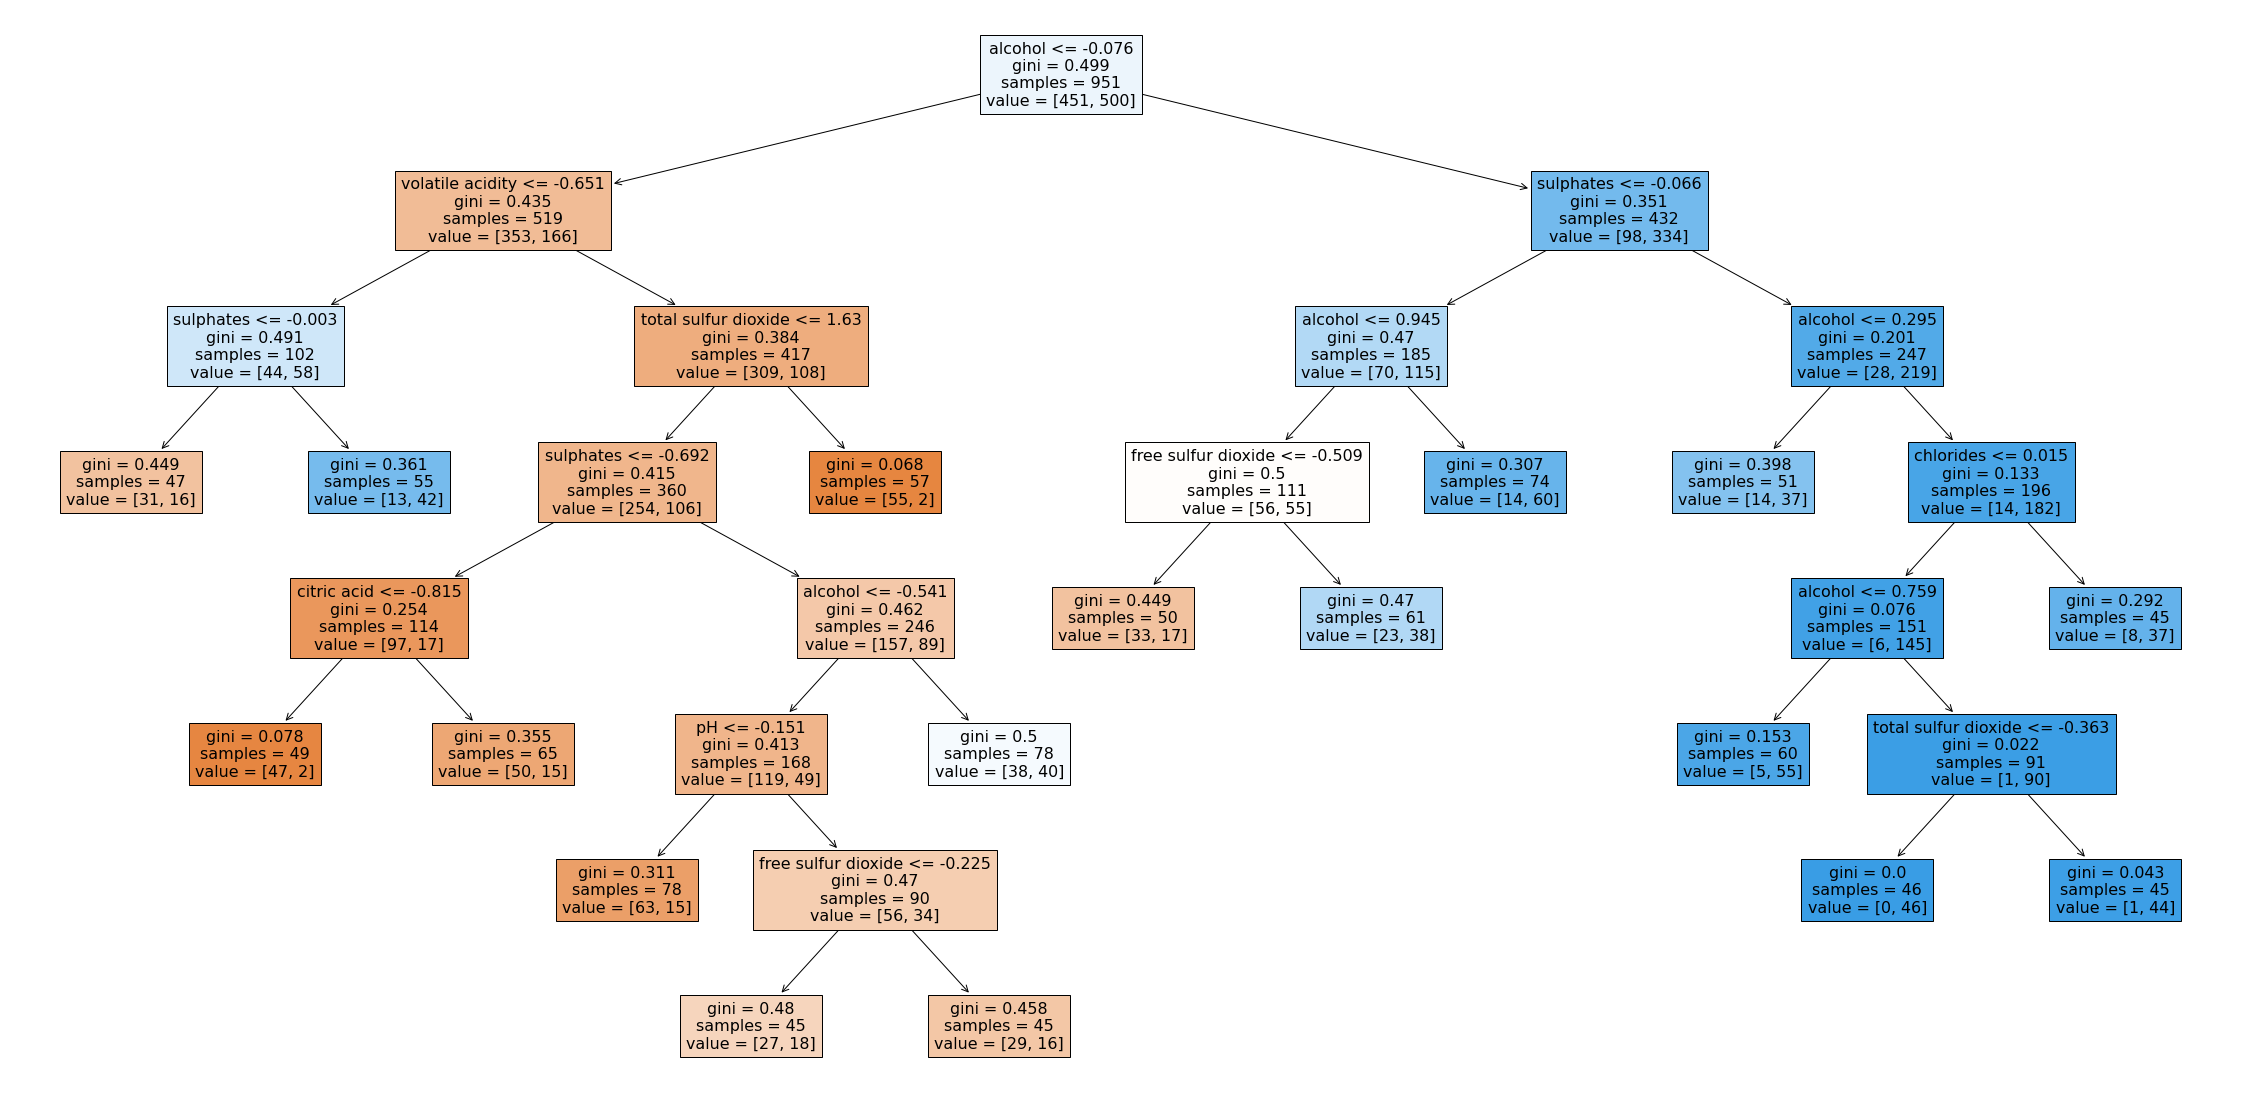

In [49]:
#Creating the Decision tree

features=X.columns 
fig=plt.figure(figsize=(40,20))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [50]:
df.shape

(1359, 12)

### ENSEMBLING TECHNIQUES
1. Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
#for i in range(10,101,2):
 #   rfc=RandomForestClassifier(n_estimators=i,max_features=12,random_state=1)
  #  print("Decision Tree NO.: ",i)
   # rfc=create_model(rfc)

In [53]:
rfc=RandomForestClassifier(n_estimators=32,max_features=12,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.69      0.72      0.71       189
           1       0.75      0.73      0.74       219

    accuracy                           0.72       408
   macro avg       0.72      0.72      0.72       408
weighted avg       0.72      0.72      0.72       408

confusion matrix
[[136  53]
 [ 60 159]]


### 2. ADA Boosting

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
ada=AdaBoostClassifier(n_estimators=12,random_state=1)

In [56]:
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       189
           1       0.72      0.69      0.71       219

    accuracy                           0.69       408
   macro avg       0.69      0.69      0.69       408
weighted avg       0.69      0.69      0.69       408

confusion matrix
[[129  60]
 [ 67 152]]


### 3.Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
#for i in range(10,101,2):
 #   print("features :",i)
  #  gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
   # gbc=create_model(gbc)

In [59]:
gbc=GradientBoostingClassifier(n_estimators=30,random_state=1)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       189
           1       0.74      0.70      0.72       219

    accuracy                           0.71       408
   macro avg       0.71      0.71      0.71       408
weighted avg       0.71      0.71      0.71       408

confusion matrix
[[135  54]
 [ 65 154]]


### 4. Xtreme Gradient Boosting

In [60]:
from xgboost import XGBClassifier

In [61]:
#for i in range(10,101,2):
 #   print("features :",i)
  #  xgb=XGBClassifier(n_estimators=i,random_state=1)
   # xgb=create_model(xgb)

In [62]:
xgb=XGBClassifier(n_estimators=66,random_state=1)
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       189
           1       0.74      0.74      0.74       219

    accuracy                           0.72       408
   macro avg       0.72      0.72      0.72       408
weighted avg       0.72      0.72      0.72       408

confusion matrix
[[133  56]
 [ 57 162]]


### Support Vector Machine

In [63]:
from sklearn.svm import LinearSVC

In [64]:
svc=LinearSVC(random_state=1)

In [65]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.65      0.72      0.69       189
           1       0.74      0.66      0.70       219

    accuracy                           0.69       408
   macro avg       0.69      0.69      0.69       408
weighted avg       0.70      0.69      0.69       408

confusion matrix
[[137  52]
 [ 74 145]]


In [66]:
svc1=LinearSVC(random_state=1,C=0.5)
svc1=create_model(svc1)
#since no change in recall value even after adding error, so this is non linear svm

              precision    recall  f1-score   support

           0       0.65      0.72      0.69       189
           1       0.74      0.66      0.70       219

    accuracy                           0.69       408
   macro avg       0.69      0.69      0.69       408
weighted avg       0.70      0.69      0.69       408

confusion matrix
[[137  52]
 [ 74 145]]


In [67]:
from sklearn.svm import SVC

In [68]:
#Polynomial SVM
poly_svc = SVC(random_state=1,kernel="poly")

In [69]:
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       189
           1       0.72      0.66      0.69       219

    accuracy                           0.68       408
   macro avg       0.68      0.68      0.68       408
weighted avg       0.68      0.68      0.68       408

confusion matrix
[[133  56]
 [ 75 144]]


In [70]:
#Radial Basis SVM
poly_svc1 = SVC(random_state=1,kernel="rbf")

In [71]:
poly_svc1=create_model(poly_svc1)
#dataset is os radial basis SVM

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       189
           1       0.75      0.67      0.71       219

    accuracy                           0.70       408
   macro avg       0.71      0.71      0.70       408
weighted avg       0.71      0.70      0.70       408

confusion matrix
[[141  48]
 [ 73 146]]


### Naive Bayes classifier
1. Gaussian Naive Bayes classifier

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
gnb=GaussianNB()

In [74]:
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       189
           1       0.72      0.68      0.70       219

    accuracy                           0.68       408
   macro avg       0.68      0.68      0.68       408
weighted avg       0.69      0.68      0.68       408

confusion matrix
[[130  59]
 [ 70 149]]


### Report for every Algorithm:

1. Name:         Logistic Regression  
   Recall score: 0 = 0.72, 1 = 0.67 [72]  
   Conclusion:   we cannot deploy with this model because it is always overfit.  
   
2. Name:         Decision Tree [Min Sample Leaf]  
   Recall Score: 0 = 0.72, 1 = 0.70 [65]   
   Conclusion:   we got good recall score here but we can achieve better.  
   
3. Name:         Random Forest Classifier  
   Recall Score: 0 = 0.72, 1 = 0.73 [60]   
   Conclusion:   recall score got better we can try for best.   

4. Name:         ADA Boosting   
   Recall score: 0 = 0.68, 1 = 0.69 [67]   
   Conclusion:   recall score is not good as above 2 models we can get better recall score.   
   
5. Name:         Gradient Boosting   
   Recall score: 0 = 0.71, 1 = 0.70 [65]   
   Conclusion:   recall score got better we can try for best.   
   
6. Name:         Xtreme Gradient Boosting   
   Recall score: 0 = 0.70, 1 = 0.74 [57]   
   Conclusion:   recall score here is better we can try for best.   
   
7. Name:         Support Vector Machine   
   Recall score: 0 = 0.75, 1 = 0.67 [73]   
   Conclusion:   Here dataset is Radial Basis but recall score is not as good as xtreme boosting.   
   
8. Name:         Navie Bayes Classifier   
   Recall score: 0 = 0.69, 1 = 0.68 [70]   
   Conclusion:   Here recall score is also not as good as xtreme boosting.   


### Final Conclusion:
We have tried to a predict classification problem in Wine Quality Dataset by a variety of models to classifiy Wine Quality predictions in the contex of determining whether Wine is Good or Bad based on the Various input parameters.

   Name:              Xtreme Gradient Boosting   
   Recall score:      0 = 0.70, 1 = 0.74 [57]

As in the dataset recall score is very important.So by predicting with various classification problem 'Xtreme Gradient Boosting' has the best Recall score and it shows the better prediction amongs all the different Classification.
